In [1]:
import torch
import torch.nn as nn

/home/mohammed/environments/pytorch/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
weight = 0.7
bias = 0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias
X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X), len(Y)

(50, 50)

# spllitting Data into train and test

In [4]:
train_split = int(0.8 * len(X))
# x -> features
# y -> labels
x_train, y_train = X[:train_split],Y[:train_split]
x_test , y_test = X[train_split:],Y[train_split:]

len(x_train), len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

In [5]:
x_train[:10], y_train[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Visualizing using Matplotlib

In [6]:
import matplotlib.pyplot as plt


def plot_prediction(train_data = x_train,
                    train_labels = y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plot training data, test data and compare predictions.
    """
    plt.figure(figsize=(10,7))

    # plot train data
    plt.scatter(train_data, train_labels,c='b',s=4,label="Training Data")

    # plot test data
    plt.scatter(test_data, test_labels,c='r',s=4, label="Testing data")
    
    # checking for pred
    if predictions is not None:
        plt.scatter(test_data, predictions,c='g',s=4, label="Prediction")

    plt.legend(prop={"size":14})

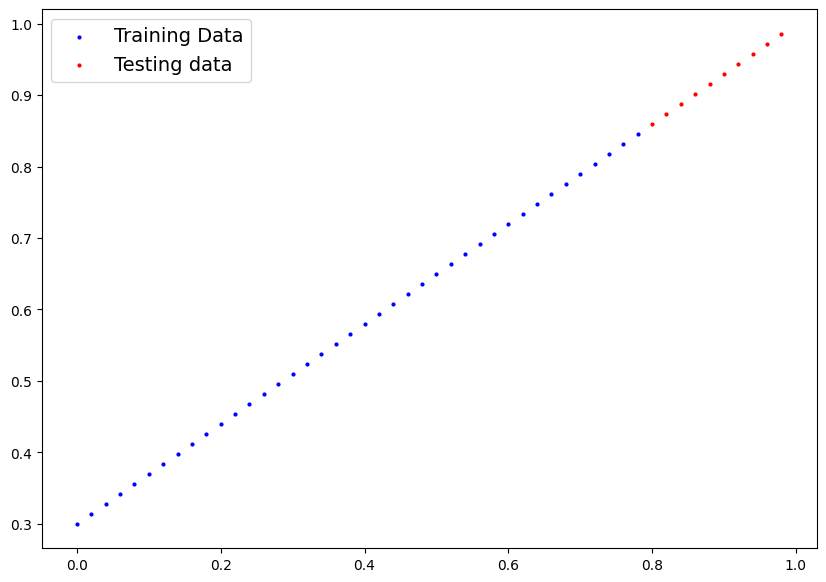

In [7]:
plot_prediction()

# Model Bulding

In [8]:
# Linear Regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))

    def forward(self, x:torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias

# Checking content of pytorch model
### check model parameters using `.parameters()`

In [9]:
# For reproducibility manual seed
torch.manual_seed(42)

# Model instance
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predictions using `torch.inference_mode()`
#### Let's see how well it predicts `y_test`(test labels) with `x_test` (test data)

In [11]:
x_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
# Making prediction
with torch.inference_mode(): 
    y_preds = model_0(x_test)

# with torch.no_grad(): 
#     y_preds = model_0(x_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

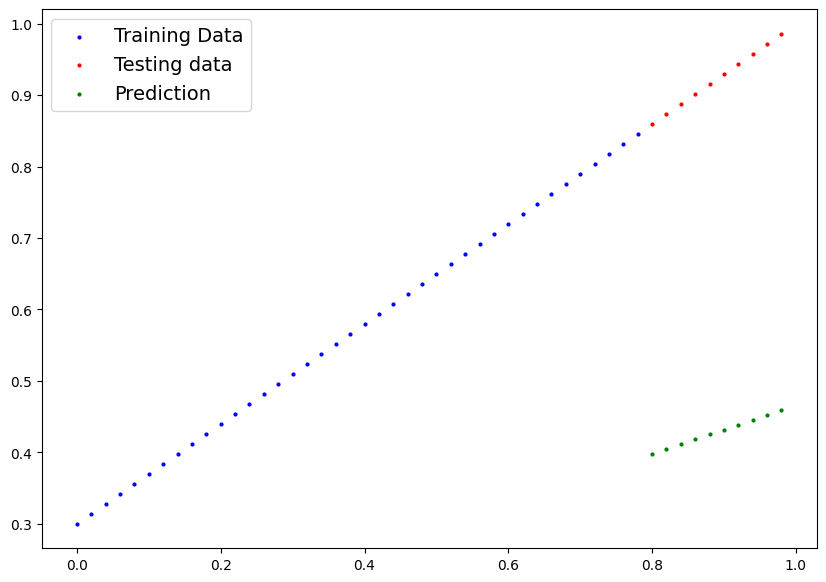

In [13]:
plot_prediction(predictions=y_preds)

# Training Model

In [14]:
# Set up a loss function
loss_fn = nn.L1Loss() # Mean Absolute Error

# Set up an optimizer Stochastic Gradient Descent
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.001)


## Building train and test loop

1. Looping through data
2. Forward Pass
3. Calculate the loss
4. optimizer zero grad
5. loss backward
6. optimizer step

In [15]:
# Before the epoch see the params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
torch.manual_seed(42)

epoch_count = []
loss_value = []
test_loss_value = []

epochs = 4000

for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()


    # 1. Forward pass
    y_preds = model_0(x_train)

    #2. Loss caluculation
    loss = loss_fn(y_preds, y_train)

    #3 . optimizer zero grad
    optimizer.zero_grad()

    # 4. Backprop on the loss with respect to the parameters of the model
    loss.backward()

    # 5. step the optimizer (perform gradient descent)
    optimizer.step()

    model_0.eval() # turns off gradaient tracking

    with torch.inference_mode():
        test_pred = model_0(x_test)

        test_loss = loss_fn(test_pred,y_test)


    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_value.append(loss)
        test_loss_value.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss} ")

    

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609 
Epoch: 10 | Loss: 0.3013603389263153 | Test Loss: 0.4797181189060211 
Epoch: 20 | Loss: 0.28983938694000244 | Test Loss: 0.4662471413612366 
Epoch: 30 | Loss: 0.2783183455467224 | Test Loss: 0.4527761936187744 
Epoch: 40 | Loss: 0.26679736375808716 | Test Loss: 0.43930521607398987 
Epoch: 50 | Loss: 0.2552763819694519 | Test Loss: 0.4258342385292053 
Epoch: 60 | Loss: 0.24375538527965546 | Test Loss: 0.41236335039138794 
Epoch: 70 | Loss: 0.232234388589859 | Test Loss: 0.398892343044281 
Epoch: 80 | Loss: 0.22071340680122375 | Test Loss: 0.38542139530181885 
Epoch: 90 | Loss: 0.2091923952102661 | Test Loss: 0.3719504475593567 
Epoch: 100 | Loss: 0.19767141342163086 | Test Loss: 0.35847947001457214 
Epoch: 110 | Loss: 0.18615040183067322 | Test Loss: 0.34500852227211 
Epoch: 120 | Loss: 0.17462942004203796 | Test Loss: 0.33153754472732544 
Epoch: 130 | Loss: 0.16310855746269226 | Test Loss: 0.3180667459964752 
Epoch: 

In [17]:
# after one epoch
model_0.state_dict()

OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])

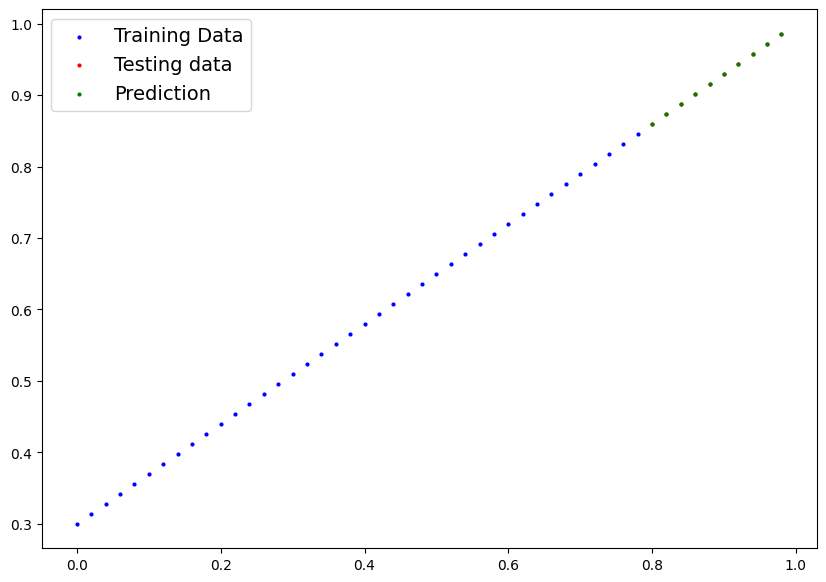

In [18]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)
plot_prediction(predictions=y_preds_new)

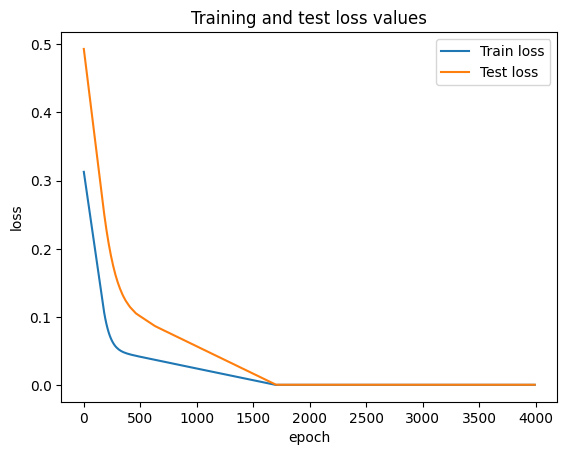

In [22]:
# plot the loss curve
import numpy as np
plt.plot(epoch_count,np.array(torch.tensor(loss_value).numpy()), label="Train loss")
plt.plot(epoch_count,test_loss_value,label="Test loss")
plt.title("Training and test loss values")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()